In [1]:
import cmocean.cm as cm
import datetime as dt
import glob
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from mocsy import mocsy
import gsw

from salishsea_tools import viz_tools

In [2]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
tmask = mesh['tmask']
deptht = mesh['gdept_1d'][0]

In [3]:
tmask

<xarray.DataArray 'tmask' (t: 1, z: 40, y: 898, x: 398)>
[14296160 values with dtype=int8]
Dimensions without coordinates: t, z, y, x
Attributes:
    standard_name:  tmask
    long_name:      mask for T-grid and W-grid
    flag_values:    0, 1
    flag_meanings:  land, water

In [4]:
kk = np.array([0.74711466, 3.54136997, 0.37895037, 7.19318921, 0.42550747])

In [5]:
def growth(k, pH, co2):
    mm = co2/(k[1] + co2)
    tt = k[0] * (1 + k[2] * (1 + np.tanh((pH - k[3]) / k[4])))
    return mm * tt, mm, tt

In [6]:
def plot_box(ax, corn, colour):
    ax.plot([corn[2], corn[3], corn[3], corn[2], corn[2]], 
            [corn[0], corn[0], corn[1], corn[1], corn[0]], '-', color=colour)

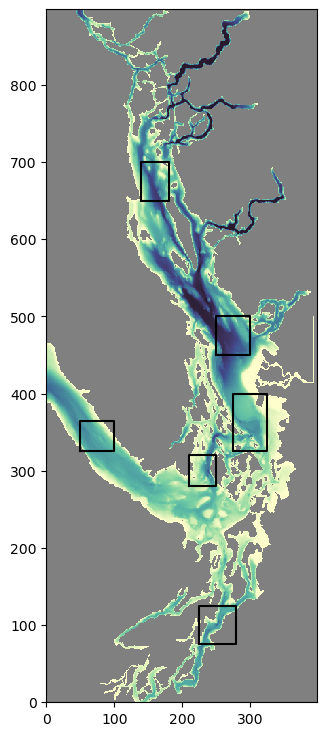

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax);
CentralSoG = [450,500, 250, 300]
plot_box(ax, CentralSoG, 'k')

NorthernSoG = [650,700, 140,180]
plot_box(ax, NorthernSoG, 'k')

SouthernSoG = [325,400, 275, 325]
plot_box(ax, SouthernSoG, 'k')

Mixed = [280,320, 210, 250]
plot_box(ax, Mixed, 'k')

JdF = [325,365, 50, 100]
plot_box(ax, JdF, 'k')

PS_main = [75,125, 225, 280]
plot_box(ax, PS_main, 'k')

SS_all = [0, 898, 0, 398]

boxes = [SS_all, SouthernSoG,CentralSoG, NorthernSoG, PS_main, Mixed, JdF]
boxnames = ['SS_all', 'SouthernSoG', 'CentralSoG', 'NorthernSoG', 'PS_main', 'Mixed',
           'JdF']

### Central SoG

In [34]:
# needs grid files
def get_CSoGtinsitu(files):
    CSoGtinsitu = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        CSoGtinsitu.append(gsw.t_from_CT(np.ma.masked_where(tmask[0,0:5,CentralSoG[0]:CentralSoG[1], 
                               CentralSoG[2]:CentralSoG[3]]==0,neutral.vosaline[0, 0:5, CentralSoG[0]:CentralSoG[1], 
                               CentralSoG[2]:CentralSoG[3]]).mean(),
                                       np.ma.masked_where(tmask[0,0:5,CentralSoG[0]:CentralSoG[1], 
                               CentralSoG[2]:CentralSoG[3]]==0,neutral.votemper[0, 0:5, CentralSoG[0]:CentralSoG[1], 
                               CentralSoG[2]:CentralSoG[3]]).mean(),0))
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return CSoGtinsitu, times  

In [35]:
print(CentralSoG)

[450, 500, 250, 300]


In [50]:
# needs grid files
def get_CSoGSpsu(files):
    CSoGSpsu = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        CSoGSpsu.append(np.ma.masked_where(tmask[0,0:5,CentralSoG[0]:CentralSoG[1], 
                               CentralSoG[2]:CentralSoG[3]]==0,neutral.vosaline[0, 0:5, CentralSoG[0]:CentralSoG[1], 
                               CentralSoG[2]:CentralSoG[3]]).mean()*35/35.16504)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return CSoGSpsu, times 

In [51]:
# needs carp files
def get_CSoGTA(files):
    CSoGTA = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        CSoGTA.append(np.ma.masked_where(tmask[0,0:5,CentralSoG[0]:CentralSoG[1], 
                               CentralSoG[2]:CentralSoG[3]]==0,neutral.total_alkalinity[0, 0:5, CentralSoG[0]:CentralSoG[1], 
                               CentralSoG[2]:CentralSoG[3]]).mean()/1000)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return CSoGTA, times 

In [52]:
# needs carp files
def get_CSoGDIC(files):
    CSoGDIC = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        CSoGDIC.append(np.ma.masked_where(tmask[0,0:5,CentralSoG[0]:CentralSoG[1], 
                               CentralSoG[2]:CentralSoG[3]]==0,neutral.dissolved_inorganic_carbon[0, 0:5, CentralSoG[0]:CentralSoG[1], 
                               CentralSoG[2]:CentralSoG[3]]).mean()/1000)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return CSoGDIC, times 

In [53]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_*grid*.nc'))
tinsitu_CSoG, times_CSoG = get_CSoGtinsitu(files)
Spsu_CSoG, times_CSoG = get_CSoGSpsu(files)

In [54]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_*carp*.nc'))
TA_CSoG, times_CSoG = get_CSoGTA(files)
DIC_CSoG, times_CSoG= get_CSoGDIC(files)

In [55]:
ones = np.ones_like(tinsitu_CSoG)

In [56]:
CSoG_response_tup = mocsy.mvars(temp=tinsitu_CSoG, sal=Spsu_CSoG, alk=TA_CSoG, 
                           dic=DIC_CSoG, 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
CSoG_pH,CSoG_pco2,CSoG_fco2,CSoG_co2,CSoG_hco3,CSoG_co3,CSoG_OmegaA,CSoG_OmegaC,CSoG_BetaD,CSoG_DENis,CSoG_p,CSoG_Tis = CSoG_response_tup

In [57]:
len(CSoG_Tis)

72

In [58]:
CSoG_Tis[24:35]

array([ 6.653093  ,  7.6869593 ,  8.66326875, 10.3636844 , 14.36947773,
       16.39639238, 17.79295664, 16.8285225 , 14.26673136, 12.80402203,
        9.44604482])

## Puget Sound - Central Basin

In [ ]:
# needs grid files
def get_PStemp(files):
    PStemp = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        PStemp.append(np.ma.masked_where(tmask[0,0:5,PS_main[0]:PS_main[1], 
                               PS_main[2]:PS_main[3]]==0,neutral.votemper[0, 0:5, PS_main[0]:PS_main[1], 
                               PS_main[2]:PS_main[3]].mean(axis=0).mean(axis=0).mean(axis=0),0))
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return PStemp, times  

In [59]:
# needs grid files
def get_PStinsitu(files):
    PStinsitu = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        PStinsitu.append(gsw.t_from_CT(np.ma.masked_where(tmask[0,0:5,PS_main[0]:PS_main[1], 
                               PS_main[2]:PS_main[3]]==0,neutral.vosaline[0, 0:5, PS_main[0]:PS_main[1], 
                               PS_main[2]:PS_main[3]]).mean(),
                                       np.ma.masked_where(tmask[0,0:5,PS_main[0]:PS_main[1], 
                               PS_main[2]:PS_main[3]]==0,neutral.votemper[0, 0:5, PS_main[0]:PS_main[1], 
                               PS_main[2]:PS_main[3]]).mean(),0))
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return PStinsitu, times  

In [61]:
print(PS_main)

[75, 125, 225, 280]


In [63]:
# needs grid files
def get_PSSpsu(files):
    PSSpsu = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        PSSpsu.append(np.ma.masked_where(tmask[0,0:5,PS_main[0]:PS_main[1], 
                               PS_main[2]:PS_main[3]]==0,neutral.vosaline[0, 0:5, PS_main[0]:PS_main[1], 
                               PS_main[2]:PS_main[3]]).mean()*35/35.16504)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return PSSpsu, times 

In [64]:
# needs carp files
def get_PSTA(files):
    PSTA = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        PSTA.append(np.ma.masked_where(tmask[0,0:5,PS_main[0]:PS_main[1], 
                               PS_main[2]:PS_main[3]]==0,neutral.total_alkalinity[0, 0:5, PS_main[0]:PS_main[1], 
                               PS_main[2]:PS_main[3]]).mean()/1000)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return PSTA, times 

In [65]:
# needs carp files
def get_PSDIC(files):
    PSDIC = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        PSDIC.append(np.ma.masked_where(tmask[0,0:5,PS_main[0]:PS_main[1], 
                               PS_main[2]:PS_main[3]]==0,neutral.dissolved_inorganic_carbon[0, 0:5, PS_main[0]:PS_main[1], 
                               PS_main[2]:PS_main[3]]).mean()/1000)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return PSDIC, times 

In [67]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_*grid*.nc'))
tinsitu_PS, times_PS = get_PStinsitu(files)
Spsu_PS, times_PS = get_PSSpsu(files)

In [68]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_*carp*.nc'))
TA_PS, times_PS = get_PSTA(files)
DIC_PS, times_PS= get_PSDIC(files)

In [69]:
ones = np.ones_like(tinsitu_PS)

In [70]:
PS_response_tup = mocsy.mvars(temp=tinsitu_PS, sal=Spsu_PS, alk=TA_PS, 
                           dic=DIC_PS, 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
PS_pH,PS_pco2,PS_fco2,PS_co2,PS_hco3,PS_co3,PS_OmegaA,PS_OmegaC,PS_BetaD,PS_DENis,PS_p,PS_Tis = PS_response_tup

In [71]:
PS_Tis[24:35]

array([ 8.73774776,  9.42552325,  9.88801078, 11.01889172, 13.96301656,
       16.43680149, 18.0646265 , 17.09025295, 14.60726235, 13.27607725,
       10.93896091])

## Northern SoG

In [73]:
# needs grid files
def get_NSoGtinsitu(files):
    NSoGtinsitu = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        NSoGtinsitu.append(gsw.t_from_CT(np.ma.masked_where(tmask[0,0:5,NorthernSoG[0]:NorthernSoG[1], 
                               NorthernSoG[2]:NorthernSoG[3]]==0,neutral.vosaline[0, 0:5, NorthernSoG[0]:NorthernSoG[1], 
                               NorthernSoG[2]:NorthernSoG[3]]).mean(),
                                       np.ma.masked_where(tmask[0,0:5,NorthernSoG[0]:NorthernSoG[1], 
                               NorthernSoG[2]:NorthernSoG[3]]==0,neutral.votemper[0, 0:5, NorthernSoG[0]:NorthernSoG[1], 
                               NorthernSoG[2]:NorthernSoG[3]]).mean(),0))
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return NSoGtinsitu, times  

In [74]:
print(NorthernSoG)

[650, 700, 140, 180]


In [75]:
# needs grid files
def get_NSoGSpsu(files):
    NSoGSpsu = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        NSoGSpsu.append(np.ma.masked_where(tmask[0,0:5,NorthernSoG[0]:NorthernSoG[1], 
                               NorthernSoG[2]:NorthernSoG[3]]==0,neutral.vosaline[0, 0:5, NorthernSoG[0]:NorthernSoG[1], 
                               NorthernSoG[2]:NorthernSoG[3]]).mean()*35/35.16504)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return NSoGSpsu, times 

In [76]:
# needs carp files
def get_NSoGTA(files):
    NSoGTA = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        NSoGTA.append(np.ma.masked_where(tmask[0,0:5,NorthernSoG[0]:NorthernSoG[1], 
                               NorthernSoG[2]:NorthernSoG[3]]==0,neutral.total_alkalinity[0, 0:5, NorthernSoG[0]:NorthernSoG[1], 
                               NorthernSoG[2]:NorthernSoG[3]]).mean()/1000)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return NSoGTA, times 

In [77]:
# needs carp files
def get_NSoGDIC(files):
    NSoGDIC = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        NSoGDIC.append(np.ma.masked_where(tmask[0,0:5,NorthernSoG[0]:NorthernSoG[1], 
                               NorthernSoG[2]:NorthernSoG[3]]==0,neutral.dissolved_inorganic_carbon[0, 0:5, NorthernSoG[0]:NorthernSoG[1], 
                               NorthernSoG[2]:NorthernSoG[3]]).mean()/1000)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return NSoGDIC, times 

In [78]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_*grid*.nc'))
tinsitu_NSoG, times_NSoG = get_NSoGtinsitu(files)
Spsu_NSoG, times_NSoG = get_NSoGSpsu(files)

In [79]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_*carp*.nc'))
TA_NSoG, times_NSoG = get_NSoGTA(files)
DIC_NSoG, times_NSoG= get_NSoGDIC(files)

In [80]:
ones = np.ones_like(tinsitu_NSoG)

In [81]:
NSoG_response_tup = mocsy.mvars(temp=tinsitu_NSoG, sal=Spsu_NSoG, alk=TA_NSoG, 
                           dic=DIC_NSoG, 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
NSoG_pH,NSoG_pco2,NSoG_fco2,NSoG_co2,NSoG_hco3,NSoG_co3,NSoG_OmegaA,NSoG_OmegaC,NSoG_BetaD,NSoG_DENis,NSoG_p,NSoG_Tis = NSoG_response_tup

In [82]:
len(NSoG_Tis)

72

In [83]:
NSoG_Tis[24:35]

array([ 7.4001747 ,  8.02851282,  8.65993643,  9.86674882, 13.85919346,
       15.4960072 , 16.37204651, 15.3775264 , 13.65009197, 11.8003803 ,
        9.74121431])

## Southern SoG

In [86]:
# needs grid files
def get_SSoGtinsitu(files):
    SSoGtinsitu = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        SSoGtinsitu.append(gsw.t_from_CT(np.ma.masked_where(tmask[0,0:5,SouthernSoG[0]:SouthernSoG[1], 
                               SouthernSoG[2]:SouthernSoG[3]]==0,neutral.vosaline[0, 0:5, SouthernSoG[0]:SouthernSoG[1], 
                               SouthernSoG[2]:SouthernSoG[3]]).mean(),
                                       np.ma.masked_where(tmask[0,0:5,SouthernSoG[0]:SouthernSoG[1], 
                               SouthernSoG[2]:SouthernSoG[3]]==0,neutral.votemper[0, 0:5, SouthernSoG[0]:SouthernSoG[1], 
                               SouthernSoG[2]:SouthernSoG[3]]).mean(),0))
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return SSoGtinsitu, times  

In [87]:
print(SouthernSoG)

[325, 400, 275, 325]


In [88]:
# needs grid files
def get_SSoGSpsu(files):
    SSoGSpsu = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        SSoGSpsu.append(np.ma.masked_where(tmask[0,0:5,SouthernSoG[0]:SouthernSoG[1], 
                               SouthernSoG[2]:SouthernSoG[3]]==0,neutral.vosaline[0, 0:5, SouthernSoG[0]:SouthernSoG[1], 
                               SouthernSoG[2]:SouthernSoG[3]]).mean()*35/35.16504)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return SSoGSpsu, times 

In [93]:
# needs carp files
def get_SSoGTA(files):
    SSoGTA = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        SSoGTA.append(np.ma.masked_where(tmask[0,0:5,SouthernSoG[0]:SouthernSoG[1], 
                               SouthernSoG[2]:SouthernSoG[3]]==0,neutral.total_alkalinity[0, 0:5, SouthernSoG[0]:SouthernSoG[1], 
                               SouthernSoG[2]:SouthernSoG[3]]).mean()/1000)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return SSoGTA, times 

In [94]:
# needs carp files
def get_SSoGDIC(files):
    SSoGDIC = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        SSoGDIC.append(np.ma.masked_where(tmask[0,0:5,SouthernSoG[0]:SouthernSoG[1], 
                               SouthernSoG[2]:SouthernSoG[3]]==0,neutral.dissolved_inorganic_carbon[0, 0:5, SouthernSoG[0]:SouthernSoG[1], 
                               SouthernSoG[2]:SouthernSoG[3]]).mean()/1000)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return SSoGDIC, times 

In [95]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_*grid*.nc'))
tinsitu_SSoG, times_SSoG = get_SSoGtinsitu(files)
Spsu_SSoG, times_SSoG = get_SSoGSpsu(files)

In [96]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_*carp*.nc'))
TA_SSoG, times_SSoG = get_SSoGTA(files)
DIC_SSoG, times_SSoG= get_SSoGDIC(files)

In [97]:
ones = np.ones_like(tinsitu_SSoG)

In [98]:
SSoG_response_tup = mocsy.mvars(temp=tinsitu_SSoG, sal=Spsu_SSoG, alk=TA_SSoG, 
                           dic=DIC_SSoG, 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
SSoG_pH,SSoG_pco2,SSoG_fco2,SSoG_co2,SSoG_hco3,SSoG_co3,SSoG_OmegaA,SSoG_OmegaC,SSoG_BetaD,SSoG_DENis,SSoG_p,SSoG_Tis = SSoG_response_tup

In [99]:
len(SSoG_Tis)

72

In [100]:
SSoG_Tis[24:35]

array([ 8.15257347,  8.53415737,  8.94141094,  9.93375702, 12.35922348,
       14.54720822, 15.52241099, 15.27585243, 13.2179963 , 11.85746899,
        9.7773623 ])

## Haro Strait

In [101]:
# needs grid files
def get_HStinsitu(files):
    HStinsitu = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        HStinsitu.append(gsw.t_from_CT(np.ma.masked_where(tmask[0,0:5,Mixed[0]:Mixed[1], 
                               Mixed[2]:Mixed[3]]==0,neutral.vosaline[0, 0:5, Mixed[0]:Mixed[1], 
                               Mixed[2]:Mixed[3]]).mean(),
                                       np.ma.masked_where(tmask[0,0:5,Mixed[0]:Mixed[1], 
                               Mixed[2]:Mixed[3]]==0,neutral.votemper[0, 0:5, Mixed[0]:Mixed[1], 
                               Mixed[2]:Mixed[3]]).mean(),0))
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return HStinsitu, times  

In [102]:
print(Mixed)

[280, 320, 210, 250]


In [103]:
# needs grid files
def get_HSSpsu(files):
    HSSpsu = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        HSSpsu.append(np.ma.masked_where(tmask[0,0:5,Mixed[0]:Mixed[1], 
                               Mixed[2]:Mixed[3]]==0,neutral.vosaline[0, 0:5, Mixed[0]:Mixed[1], 
                               Mixed[2]:Mixed[3]]).mean()*35/35.16504)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return HSSpsu, times 

In [104]:
# needs carp files
def get_HSTA(files):
    HSTA = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        HSTA.append(np.ma.masked_where(tmask[0,0:5,Mixed[0]:Mixed[1], 
                               Mixed[2]:Mixed[3]]==0,neutral.total_alkalinity[0, 0:5, Mixed[0]:Mixed[1], 
                               Mixed[2]:Mixed[3]]).mean()/1000)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return HSTA, times 

In [105]:
# needs carp files
def get_HSDIC(files):
    HSDIC = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        HSDIC.append(np.ma.masked_where(tmask[0,0:5,Mixed[0]:Mixed[1], 
                               Mixed[2]:Mixed[3]]==0,neutral.dissolved_inorganic_carbon[0, 0:5, Mixed[0]:Mixed[1], 
                               Mixed[2]:Mixed[3]]).mean()/1000)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return HSDIC, times 

In [106]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_*grid*.nc'))
tinsitu_HS, times_HS = get_HStinsitu(files)
Spsu_HS, times_HS = get_HSSpsu(files)

In [107]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_*carp*.nc'))
TA_HS, times_HS = get_HSTA(files)
DIC_HS, times_HS= get_HSDIC(files)

In [108]:
ones = np.ones_like(tinsitu_HS)

In [109]:
HS_response_tup = mocsy.mvars(temp=tinsitu_HS, sal=Spsu_HS, alk=TA_HS, 
                           dic=DIC_HS, 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
HS_pH,HS_pco2,HS_fco2,HS_co2,HS_hco3,HS_co3,HS_OmegaA,HS_OmegaC,HS_BetaD,HS_DENis,HS_p,HS_Tis = HS_response_tup

In [110]:
len(HS_Tis)

72

In [111]:
HS_Tis[24:35]

array([ 8.84073488,  8.98734724,  9.1159679 ,  9.59918119, 10.58470994,
       12.16077659, 12.71390705, 12.92907983, 11.62385322, 10.93087708,
        9.87311963])

## Juan de Fuca

In [112]:
# needs grid files
def get_JdFtinsitu(files):
    JdFtinsitu = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        JdFtinsitu.append(gsw.t_from_CT(np.ma.masked_where(tmask[0,0:5,JdF[0]:JdF[1], 
                               JdF[2]:JdF[3]]==0,neutral.vosaline[0, 0:5, JdF[0]:JdF[1], 
                               JdF[2]:JdF[3]]).mean(),
                                       np.ma.masked_where(tmask[0,0:5,JdF[0]:JdF[1], 
                               JdF[2]:JdF[3]]==0,neutral.votemper[0, 0:5, JdF[0]:JdF[1], 
                               JdF[2]:JdF[3]]).mean(),0))
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return JdFtinsitu, times  

In [113]:
print(JdF)

[325, 365, 50, 100]


In [114]:
# needs grid files
def get_JdFSpsu(files):
    JdFSpsu = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        JdFSpsu.append(np.ma.masked_where(tmask[0,0:5,JdF[0]:JdF[1], 
                               JdF[2]:JdF[3]]==0,neutral.vosaline[0, 0:5, JdF[0]:JdF[1], 
                               JdF[2]:JdF[3]]).mean()*35/35.16504)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return JdFSpsu, times 

In [115]:
# needs carp files
def get_JdFTA(files):
    JdFTA = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        JdFTA.append(np.ma.masked_where(tmask[0,0:5,JdF[0]:JdF[1], 
                               JdF[2]:JdF[3]]==0,neutral.total_alkalinity[0, 0:5, JdF[0]:JdF[1], 
                               JdF[2]:JdF[3]]).mean()/1000)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return JdFTA, times 

In [116]:
# needs carp files
def get_JdFDIC(files):
    JdFDIC = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        JdFDIC.append(np.ma.masked_where(tmask[0,0:5,JdF[0]:JdF[1], 
                               JdF[2]:JdF[3]]==0,neutral.dissolved_inorganic_carbon[0, 0:5, JdF[0]:JdF[1], 
                               JdF[2]:JdF[3]]).mean()/1000)
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return JdFDIC, times 

In [117]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_*grid*.nc'))
tinsitu_JdF, times_JdF = get_JdFtinsitu(files)
Spsu_JdF, times_JdF = get_JdFSpsu(files)

In [118]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_*carp*.nc'))
TA_JdF, times_JdF = get_JdFTA(files)
DIC_JdF, times_JdF= get_JdFDIC(files)

In [119]:
ones = np.ones_like(tinsitu_JdF)

In [120]:
JdF_response_tup = mocsy.mvars(temp=tinsitu_JdF, sal=Spsu_JdF, alk=TA_JdF, 
                           dic=DIC_JdF, 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
JdF_pH,JdF_pco2,JdF_fco2,JdF_co2,JdF_hco3,JdF_co3,JdF_OmegaA,JdF_OmegaC,JdF_BetaD,JdF_DENis,JdF_p,JdF_Tis = CSoG_response_tup

In [121]:
len(JdF_Tis)

72

In [122]:
JdF_Tis[24:35]

array([ 6.653093  ,  7.6869593 ,  8.66326875, 10.3636844 , 14.36947773,
       16.39639238, 17.79295664, 16.8285225 , 14.26673136, 12.80402203,
        9.44604482])

### Plot Monthly Temp vs. pH for 2015

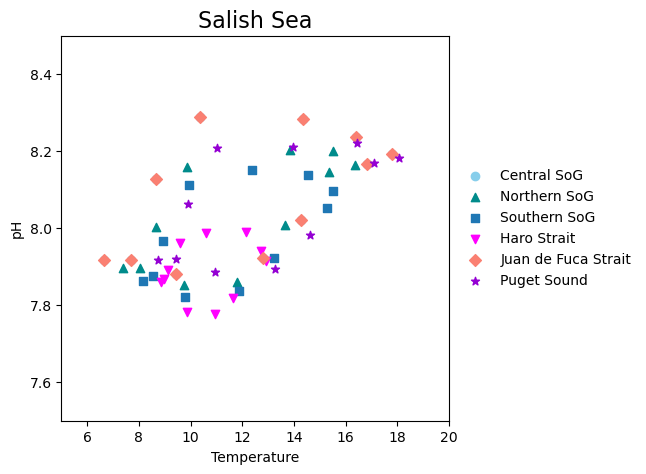

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
#ax.plot(CSoG_Tis[24:35],CSoG_pH[24:35], 'o', color='skyblue',label='Central SoG',linewidth=2)
ax.scatter(CSoG_Tis[24:35], CSoG_pH[24:35],label='Central SoG',color='skyblue')
ax.scatter(NSoG_Tis[24:35], NSoG_pH[24:35],label='Northern SoG',color='darkcyan',marker='^')
ax.scatter(SSoG_Tis[24:35], SSoG_pH[24:35],label='Southern SoG',marker='s')
ax.scatter(HS_Tis[24:35], HS_pH[24:35],label='Haro Strait',color='fuchsia',marker='v')
ax.scatter(JdF_Tis[24:35], JdF_pH[24:35],label='Juan de Fuca Strait',color='salmon',marker='D')
ax.scatter(PS_Tis[24:35], PS_pH[24:35],label='Puget Sound',color='darkviolet',marker='*')

ax.set_xlim(5,20)
ax.set_ylim(7.5,8.5)
#ax.grid();
ax.set_title('Salish Sea',fontsize=16)
ax.set_xlabel('Temperature')
ax.set_ylabel('pH')
ax.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))

### Plot Jan-Mar Temp vs. pH

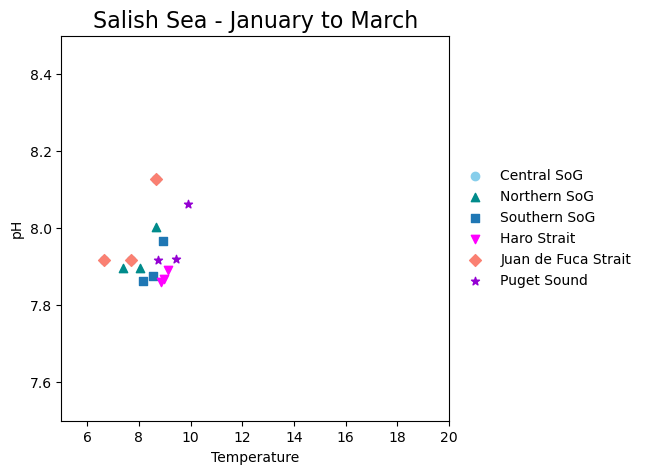

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
#ax.plot(CSoG_Tis[24:35],CSoG_pH[24:35], 'o', color='skyblue',label='Central SoG',linewidth=2)
ax.scatter(CSoG_Tis[24:27], CSoG_pH[24:27],label='Central SoG',color='skyblue')
ax.scatter(NSoG_Tis[24:27], NSoG_pH[24:27],label='Northern SoG',color='darkcyan',marker='^')
ax.scatter(SSoG_Tis[24:27], SSoG_pH[24:27],label='Southern SoG',marker='s')
ax.scatter(HS_Tis[24:27], HS_pH[24:27],label='Haro Strait',color='fuchsia',marker='v')
ax.scatter(JdF_Tis[24:27], JdF_pH[24:27],label='Juan de Fuca Strait',color='salmon',marker='D')
ax.scatter(PS_Tis[24:27], PS_pH[24:27],label='Puget Sound',color='darkviolet',marker='*')

ax.set_xlim(5,20)
ax.set_ylim(7.5,8.5)
#ax.grid();
ax.set_title('Salish Sea - January to March',fontsize=16)
ax.set_xlabel('Temperature')
ax.set_ylabel('pH')
ax.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))

### Plot April to June Temp vs. pH

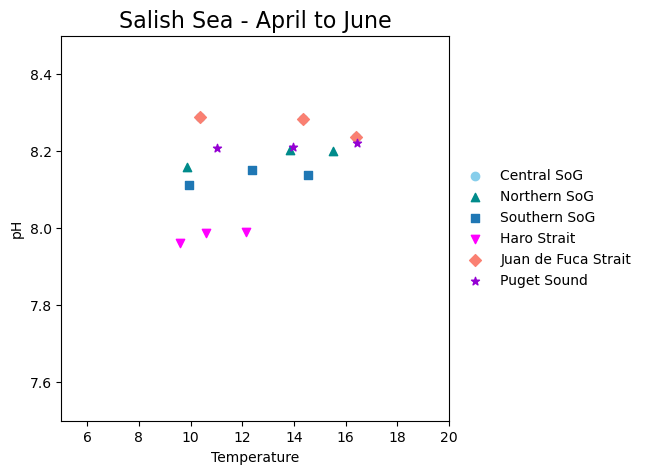

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
#ax.plot(CSoG_Tis[24:35],CSoG_pH[24:35], 'o', color='skyblue',label='Central SoG',linewidth=2)
ax.scatter(CSoG_Tis[27:30], CSoG_pH[27:30],label='Central SoG',color='skyblue')
ax.scatter(NSoG_Tis[27:30], NSoG_pH[27:30],label='Northern SoG',color='darkcyan',marker='^')
ax.scatter(SSoG_Tis[27:30], SSoG_pH[27:30],label='Southern SoG',marker='s')
ax.scatter(HS_Tis[27:30], HS_pH[27:30],label='Haro Strait',color='fuchsia',marker='v')
ax.scatter(JdF_Tis[27:30], JdF_pH[27:30],label='Juan de Fuca Strait',color='salmon',marker='D')
ax.scatter(PS_Tis[27:30], PS_pH[27:30],label='Puget Sound',color='darkviolet',marker='*')

ax.set_xlim(5,20)
ax.set_ylim(7.5,8.5)
#ax.grid();
ax.set_title('Salish Sea - April to June',fontsize=16)
ax.set_xlabel('Temperature')
ax.set_ylabel('pH')
ax.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))

### Plot July to September Temp vs. pH

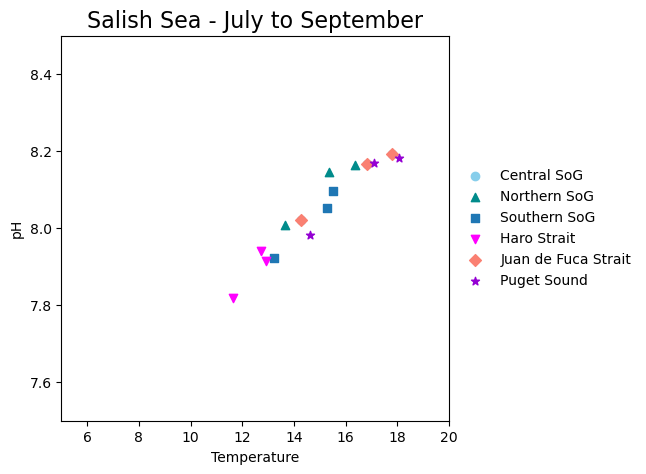

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
#ax.plot(CSoG_Tis[24:35],CSoG_pH[24:35], 'o', color='skyblue',label='Central SoG',linewidth=2)
ax.scatter(CSoG_Tis[30:33], CSoG_pH[30:33],label='Central SoG',color='skyblue')
ax.scatter(NSoG_Tis[30:33], NSoG_pH[30:33],label='Northern SoG',color='darkcyan',marker='^')
ax.scatter(SSoG_Tis[30:33], SSoG_pH[30:33],label='Southern SoG',marker='s')
ax.scatter(HS_Tis[30:33], HS_pH[30:33],label='Haro Strait',color='fuchsia',marker='v')
ax.scatter(JdF_Tis[30:33], JdF_pH[30:33],label='Juan de Fuca Strait',color='salmon',marker='D')
ax.scatter(PS_Tis[30:33], PS_pH[30:33],label='Puget Sound',color='darkviolet',marker='*')

ax.set_xlim(5,20)
ax.set_ylim(7.5,8.5)
#ax.grid();
ax.set_title('Salish Sea - July to September',fontsize=16)
ax.set_xlabel('Temperature')
ax.set_ylabel('pH')
ax.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))

### Plot October to December Temp vs. pH

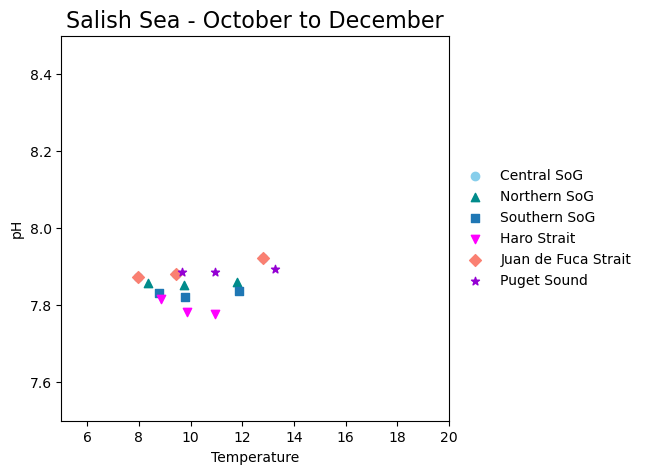

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
#ax.plot(CSoG_Tis[24:35],CSoG_pH[24:35], 'o', color='skyblue',label='Central SoG',linewidth=2)
ax.scatter(CSoG_Tis[33:36], CSoG_pH[33:36],label='Central SoG',color='skyblue')
ax.scatter(NSoG_Tis[33:36], NSoG_pH[33:36],label='Northern SoG',color='darkcyan',marker='^')
ax.scatter(SSoG_Tis[33:36], SSoG_pH[33:36],label='Southern SoG',marker='s')
ax.scatter(HS_Tis[33:36], HS_pH[33:36],label='Haro Strait',color='fuchsia',marker='v')
ax.scatter(JdF_Tis[33:36], JdF_pH[33:36],label='Juan de Fuca Strait',color='salmon',marker='D')
ax.scatter(PS_Tis[33:36], PS_pH[33:36],label='Puget Sound',color='darkviolet',marker='*')

ax.set_xlim(5,20)
ax.set_ylim(7.5,8.5)
#ax.grid();
ax.set_title('Salish Sea - October to December',fontsize=16)
ax.set_xlabel('Temperature')
ax.set_ylabel('pH')
ax.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))

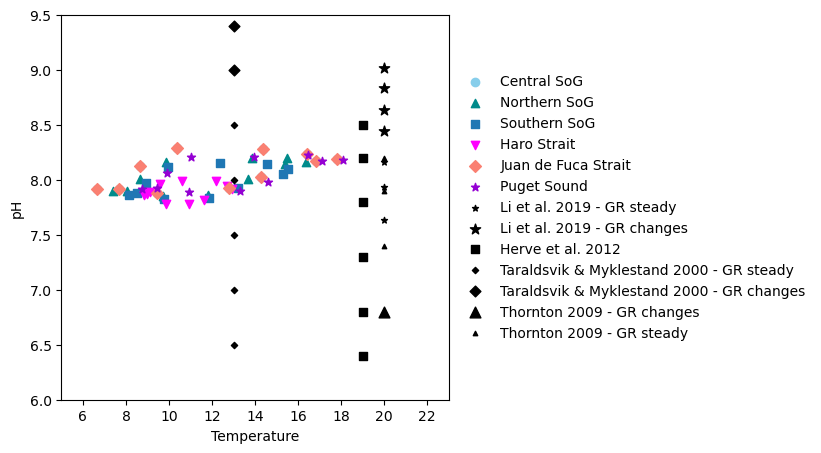

In [141]:
fig, ax = plt.subplots(figsize=(5,5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

Li_x=[20,20,20]
Li_y=[7.63,7.93,8.16]

Li2_x=[20,20,20,20]
Li2_y=[8.44,8.63,8.83,9.02]

Her_x=[19,19,19,19,19,19]
Her_y=[6.4,6.8,7.3,7.8,8.2,8.5]

TM_x=[13,13,13,13,13]
TM_y=[6.5,7,7.5,8,8.5]

TM2_x=[13,13]
TM2_y=[9,9.4]

Th_x=[20]
Th_y=[6.8]

Th2_x=[20,20,20]
Th2_y=[7.4,7.9,8.2]


ax.scatter(CSoG_Tis[24:35], CSoG_pH[24:35],label='Central SoG',color='skyblue')
ax.scatter(NSoG_Tis[24:35], NSoG_pH[24:35],label='Northern SoG',color='darkcyan',marker='^')
ax.scatter(SSoG_Tis[24:35], SSoG_pH[24:35],label='Southern SoG',marker='s')
ax.scatter(HS_Tis[24:35], HS_pH[24:35],label='Haro Strait',color='fuchsia',marker='v')
ax.scatter(JdF_Tis[24:35], JdF_pH[24:35],label='Juan de Fuca Strait',color='salmon',marker='D')
ax.scatter(PS_Tis[24:35], PS_pH[24:35],label='Puget Sound',color='darkviolet',marker='*')

ax.scatter(Li_x, Li_y,label='Li et al. 2019 - GR steady',color='k',marker='*',s=20)
ax.scatter(Li2_x, Li2_y,label='Li et al. 2019 - GR changes',color='k',marker='*',s=60)
ax.scatter(Her_x, Her_y,label='Herve et al. 2012',color='k',marker='s',s=30)
ax.scatter(TM_x, TM_y,label='Taraldsvik & Myklestand 2000 - GR steady',color='k',marker='D',s=10)
ax.scatter(TM2_x, TM2_y,label='Taraldsvik & Myklestand 2000 - GR changes',color='k',marker='D',s=30)
ax.scatter(Th_x, Th_y,label='Thornton 2009 - GR changes',color='k',marker='^',s=60)
ax.scatter(Th2_x, Th2_y,label='Thornton 2009 - GR steady',color='k',marker='^',s=10)

ax.set_xlim(5,23)
ax.set_ylim(6,9.5)
ax.set_xlabel('Temperature')
ax.set_ylabel('pH')
ax.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))  